## FAIDM Group Project: Student Performance Prediction & Clustering
### Open University Learning Analytics Dataset (OULAD)
### Module: WM9QG-15 Fundamentals of AI and Data Mining

This notebook follows the **CRISP-DM methodology** and mirrors the practical workshop structure.

# 0️⃣ Introduction

In this project, we will:

- Load and inspect the OULAD dataset (7 CSV files)
- Identify key data quality issues
- Explore the data visually and statistically
- Handle missing values using `SimpleImputer`
- Encode categorical variables using `pd.get_dummies()` and ordinal encoding
- Scale numerical variables using `StandardScaler`
- Create new engineered features (engagement metrics, early indicators)
- Build a **Predictive Model** (Supervised ML) to predict student outcomes
- Build a **Clustering Model** (Unsupervised ML) to segment students

**Business Goal:** Help the Open University identify at-risk students early for intervention.

# 1️⃣ Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


# 2️⃣ Load Dataset

The OULAD dataset consists of 7 CSV files:

| File | Description |
|------|-------------|
| studentInfo.csv | Student demographics and final outcomes (TARGET) |
| studentVle.csv | VLE click-stream data (engagement) |
| studentAssessment.csv | Assessment submissions |
| assessments.csv | Assessment metadata |
| vle.csv | VLE resource metadata |
| courses.csv | Module information |
| studentRegistration.csv | Enrollment dates |

In [2]:
# Load all datasets
# UPDATE THIS PATH to where your data files are located
DATA_PATH = '.'  

print("Loading datasets...")
print("-" * 60)

student_info = pd.read_csv(f'{DATA_PATH}/studentInfo.csv')
student_vle = pd.read_csv(f'{DATA_PATH}/studentVle.csv')
student_assessment = pd.read_csv(f'{DATA_PATH}/studentAssessment.csv')
assessments = pd.read_csv(f'{DATA_PATH}/assessments.csv')
vle = pd.read_csv(f'{DATA_PATH}/vle.csv')
courses = pd.read_csv(f'{DATA_PATH}/courses.csv')
student_registration = pd.read_csv(f'{DATA_PATH}/studentRegistration.csv')

print("All 7 datasets loaded successfully!")
print("-" * 60)

Loading datasets...
------------------------------------------------------------
All 7 datasets loaded successfully!
------------------------------------------------------------


In [3]:
# Display shape of each dataset
datasets = {
    'studentInfo': student_info,
    'studentVle': student_vle,
    'studentAssessment': student_assessment,
    'assessments': assessments,
    'vle': vle,
    'courses': courses,
    'studentRegistration': student_registration
}

print("Dataset shapes:")
print("-" * 60)
for name, df in datasets.items():
    print(f"{name}: {df.shape[0]:,} rows x {df.shape[1]} columns")
print("-" * 60)

Dataset shapes:
------------------------------------------------------------
studentInfo: 32,593 rows x 12 columns
studentVle: 10,655,280 rows x 6 columns
studentAssessment: 173,912 rows x 5 columns
assessments: 206 rows x 6 columns
vle: 6,364 rows x 6 columns
courses: 22 rows x 3 columns
studentRegistration: 32,593 rows x 5 columns
------------------------------------------------------------


# 3️⃣ Data Understanding

Following the CRISP-DM methodology, we first need to understand our data before preparing it.

## 3.1 Inspect the Main Dataset (studentInfo)

In [4]:
# Preview the data
print("First 5 rows of studentInfo:")
print("-" * 60)
student_info.head()

First 5 rows of studentInfo:
------------------------------------------------------------


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [5]:
# Data types and structure
print("Data types:")
print("-" * 60)
print(student_info.dtypes)
print("-" * 60)

Data types:
------------------------------------------------------------
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object
------------------------------------------------------------


In [6]:
# Summary statistics
print("Summary statistics:")
print("-" * 60)
student_info.describe(include='all')

Summary statistics:
------------------------------------------------------------


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


## 3.2 Check for Missing Values

In [7]:
print("Missing values per column:")
print("-" * 60)
for name, df in datasets.items():
    missing = df.isna().sum()
    if missing.any():
        print(f"\n{name}:")
        for col in missing[missing > 0].index:
            pct = missing[col] / len(df) * 100
            print(f"  {col}: {missing[col]:,} ({pct:.2f}%)")
    else:
        print(f"\n{name}: No missing values")
print("-" * 60)

Missing values per column:
------------------------------------------------------------

studentInfo:
  imd_band: 1,111 (3.41%)

studentVle: No missing values

studentAssessment:
  score: 173 (0.10%)

assessments:
  date: 11 (5.34%)

vle:
  week_from: 5,243 (82.39%)
  week_to: 5,243 (82.39%)

courses: No missing values

studentRegistration:
  date_registration: 45 (0.14%)
  date_unregistration: 22,521 (69.10%)
------------------------------------------------------------


## 3.3 Check for Duplicate Rows

In [8]:
print("Duplicate rows check:")
print("-" * 60)
print(f"studentInfo duplicates: {student_info.duplicated().sum()}")
print("-" * 60)

Duplicate rows check:
------------------------------------------------------------
studentInfo duplicates: 0
------------------------------------------------------------


## 3.4 Explore the Target Variable (final_result)

In [9]:
print("Target variable distribution (final_result):")
print("-" * 60)
result_counts = student_info['final_result'].value_counts()
result_pct = student_info['final_result'].value_counts(normalize=True) * 100

for result in result_counts.index:
    print(f"{result}: {result_counts[result]:,} ({result_pct[result]:.1f}%)")
print("-" * 60)

Target variable distribution (final_result):
------------------------------------------------------------
Pass: 12,361 (37.9%)
Withdrawn: 10,156 (31.2%)
Fail: 7,052 (21.6%)
Distinction: 3,024 (9.3%)
------------------------------------------------------------


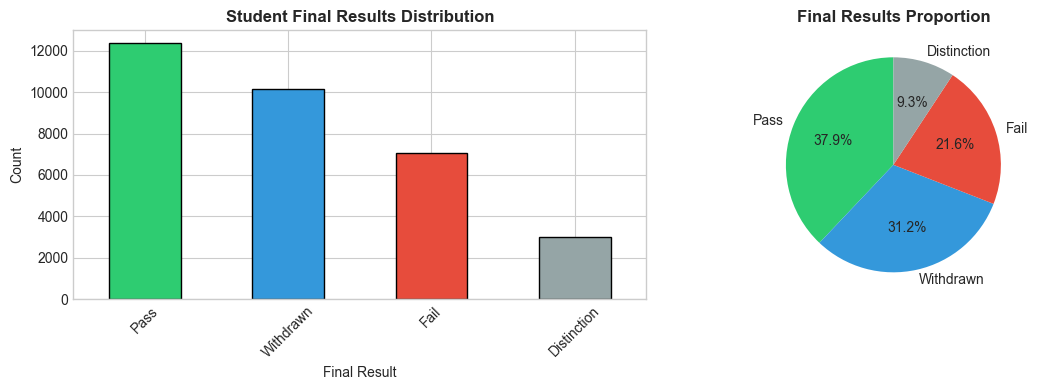


⚠️ Note: Class imbalance present - will use stratified sampling


In [10]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors = ['#2ecc71', '#3498db', '#e74c3c', '#95a5a6']

# Bar chart
result_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Student Final Results Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Final Result')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Final Results Proportion', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n⚠️ Note: Class imbalance present - will use stratified sampling")

## 3.5 Visualize Categorical Variables

In [11]:
# Explore categorical columns
categorical_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']

print("Categorical variable distributions:")
print("-" * 60)
for col in categorical_cols:
    print(f"\n{col}:")
    print(student_info[col].value_counts())
print("-" * 60)

Categorical variable distributions:
------------------------------------------------------------

gender:
gender
M    17875
F    14718
Name: count, dtype: int64

region:
region
Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: count, dtype: int64

highest_education:
highest_education
A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: count, dtype: int64

imd_band:
imd_band
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%

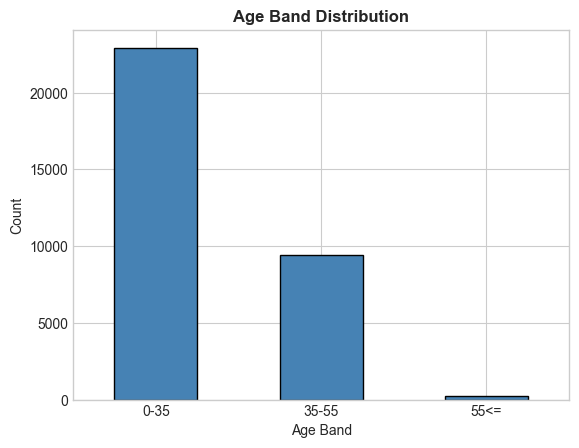

In [12]:
# Histogram for Age Distribution (using age_band as proxy)
student_info['age_band'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Age Band Distribution', fontweight='bold')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

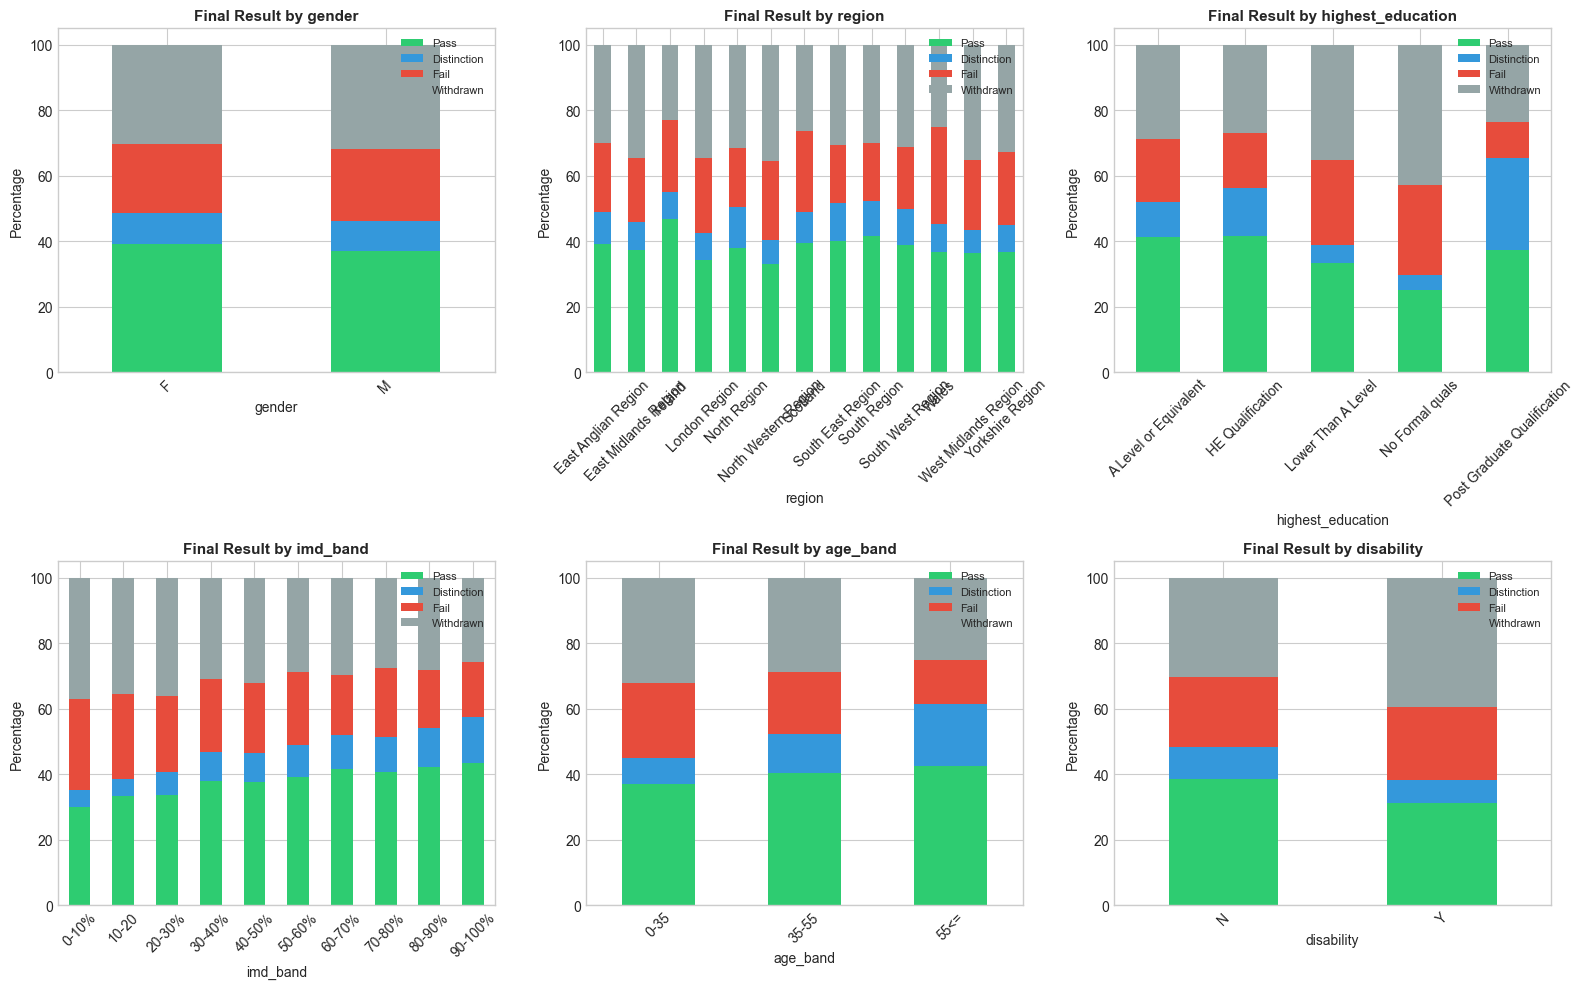

In [13]:
# Final result by demographics (stacked bar charts)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(student_info[col], student_info['final_result'], normalize='index') * 100
    ct[['Pass', 'Distinction', 'Fail', 'Withdrawn']].plot(
        kind='bar', stacked=True, ax=axes[i],
        color=['#2ecc71', '#3498db', '#e74c3c', '#95a5a6'])
    axes[i].set_title(f'Final Result by {col}', fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

## 3.6 Explore VLE Engagement Data

In [14]:
print("VLE Engagement Summary:")
print("-" * 60)
print(f"Total interaction records: {len(student_vle):,}")
print(f"Total clicks: {student_vle['sum_click'].sum():,}")
print(f"Unique students with VLE activity: {student_vle['id_student'].nunique():,}")
print(f"Date range: {student_vle['date'].min()} to {student_vle['date'].max()}")
print("  (negative dates = before course start)")
print("-" * 60)

print("\nClick statistics:")
print(student_vle['sum_click'].describe())

VLE Engagement Summary:
------------------------------------------------------------
Total interaction records: 10,655,280
Total clicks: 39,605,099
Unique students with VLE activity: 26,074
Date range: -25 to 269
  (negative dates = before course start)
------------------------------------------------------------

Click statistics:
count    1.065528e+07
mean     3.716946e+00
std      8.849047e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.977000e+03
Name: sum_click, dtype: float64


In [15]:
# VLE Activity Types
print("\nVLE Activity Types:")
print("-" * 60)
print(vle['activity_type'].value_counts())


VLE Activity Types:
------------------------------------------------------------
activity_type
resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: count, dtype: int64


## 3.7 Explore Assessment Data

In [16]:
print("Assessment Summary:")
print("-" * 60)
print(f"Total assessments in catalog: {len(assessments)}")
print(f"Total submissions: {len(student_assessment):,}")
print(f"\nAssessment types:")
print(assessments['assessment_type'].value_counts())
print("-" * 60)

print("\nScore statistics:")
print(student_assessment['score'].describe())

missing_scores = student_assessment['score'].isna().sum()
print(f"\nMissing scores: {missing_scores:,} ({missing_scores/len(student_assessment)*100:.2f}%)")

Assessment Summary:
------------------------------------------------------------
Total assessments in catalog: 206
Total submissions: 173,912

Assessment types:
assessment_type
TMA     106
CMA      76
Exam     24
Name: count, dtype: int64
------------------------------------------------------------

Score statistics:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

Missing scores: 173 (0.10%)


# 4️⃣ Data Preparation

Now we prepare the data for modelling by:
1. Merging datasets
2. Creating features (Feature Engineering)
3. Handling missing values
4. Encoding categorical variables
5. Scaling numerical features

## 4.1 Create Unified Dataset

In [17]:
print("Step 1: Create base dataset from studentInfo")
print("-" * 60)

df = student_info.copy()

# Create unique key for joining
df['student_module_key'] = (df['id_student'].astype(str) + '_' + 
                            df['code_module'] + '_' + 
                            df['code_presentation'])

print(f"Base dataset shape: {df.shape}")
print("-" * 60)

Step 1: Create base dataset from studentInfo
------------------------------------------------------------
Base dataset shape: (32593, 13)
------------------------------------------------------------


In [18]:
print("Step 2: Merge with courses")
print("-" * 60)

df = df.merge(courses, on=['code_module', 'code_presentation'], how='left')
print(f"After merge: {df.shape}")
print("-" * 60)

Step 2: Merge with courses
------------------------------------------------------------
After merge: (32593, 14)
------------------------------------------------------------


In [19]:
print("Step 3: Merge with registration data")
print("-" * 60)

df = df.merge(student_registration, on=['code_module', 'code_presentation', 'id_student'], how='left')
print(f"After merge: {df.shape}")
print("-" * 60)

Step 3: Merge with registration data
------------------------------------------------------------
After merge: (32593, 16)
------------------------------------------------------------


## 4.2 Feature Engineering - Registration Features

In [20]:
print("Step 4: Create registration features")
print("-" * 60)

# Whether student registered early (before course start)
df['registered_early'] = (df['date_registration'] < 0).astype(int)

# Days registered before course start
df['days_before_start'] = df['date_registration'].apply(lambda x: abs(x) if x < 0 else 0)

# Whether student unregistered
df['withdrew'] = df['date_unregistration'].notna().astype(int)

print("Created features: registered_early, days_before_start, withdrew")
print(df[['date_registration', 'registered_early', 'days_before_start', 'withdrew']].head())
print("-" * 60)

Step 4: Create registration features
------------------------------------------------------------
Created features: registered_early, days_before_start, withdrew
   date_registration  registered_early  days_before_start  withdrew
0             -159.0                 1              159.0         0
1              -53.0                 1               53.0         0
2              -92.0                 1               92.0         1
3              -52.0                 1               52.0         0
4             -176.0                 1              176.0         0
------------------------------------------------------------


## 4.3 Feature Engineering - Assessment Features

In [21]:
print("Step 5: Create assessment features")
print("-" * 60)

# Merge assessment metadata
assessments_with_meta = student_assessment.merge(assessments, on='id_assessment', how='left')

# Create student-module key
assessments_with_meta['student_module_key'] = (
    assessments_with_meta['id_student'].astype(str) + '_' + 
    assessments_with_meta['code_module'] + '_' + 
    assessments_with_meta['code_presentation']
)

# Aggregate assessment features per student-module
assessment_agg = assessments_with_meta.groupby('student_module_key').agg({
    'score': ['mean', 'std', 'min', 'max', 'count'],
    'date_submitted': ['mean', 'std'],
    'is_banked': 'sum'
}).reset_index()

# Flatten column names
assessment_agg.columns = [
    'student_module_key', 'avg_score', 'score_std', 'min_score', 'max_score',
    'num_assessments', 'avg_submission_day', 'submission_std', 'num_banked'
]

print(f"Assessment features shape: {assessment_agg.shape}")
print(assessment_agg.head())
print("-" * 60)

Step 5: Create assessment features
------------------------------------------------------------
Assessment features shape: (25843, 9)
  student_module_key  avg_score  score_std  min_score  max_score  \
0   100064_FFF_2013J  89.333333   4.773665       82.0       94.0   
1   100282_BBB_2013J  78.000000        NaN       78.0       78.0   
2   100561_DDD_2014J  67.142857  18.721009       31.0       87.0   
3  1006742_FFF_2014B  78.500000   0.707107       78.0       79.0   
4   100788_CCC_2014J  91.200000   6.833740       83.0      100.0   

   num_assessments  avg_submission_day  submission_std  num_banked  
0               12          153.250000       58.656357           0  
1                1           19.000000             NaN           0  
2                7          116.714286       82.723867           0  
3                2           30.500000       13.435029           0  
4                5          140.000000       95.273291           0  
-------------------------------------------

In [22]:
print("Step 6: Create submission timeliness features")
print("-" * 60)

# Days early = due date - submission date (positive = early)
assessments_with_meta['days_early'] = assessments_with_meta['date'] - assessments_with_meta['date_submitted']

timeliness = assessments_with_meta.groupby('student_module_key').agg({
    'days_early': ['mean', 'min']
}).reset_index()
timeliness.columns = ['student_module_key', 'avg_days_early', 'worst_days_early']

assessment_agg = assessment_agg.merge(timeliness, on='student_module_key', how='left')
print("Created: avg_days_early, worst_days_early")
print("-" * 60)

Step 6: Create submission timeliness features
------------------------------------------------------------
Created: avg_days_early, worst_days_early
------------------------------------------------------------


In [23]:
print("Step 7: Create assessment type-specific features")
print("-" * 60)

# Features for each assessment type (TMA, CMA, Exam)
for atype in ['TMA', 'CMA', 'Exam']:
    type_data = assessments_with_meta[assessments_with_meta['assessment_type'] == atype]
    type_agg = type_data.groupby('student_module_key').agg({'score': ['mean', 'count']}).reset_index()
    type_agg.columns = ['student_module_key', f'{atype.lower()}_avg_score', f'{atype.lower()}_count']
    assessment_agg = assessment_agg.merge(type_agg, on='student_module_key', how='left')
    print(f"  Added {atype} features")

print("-" * 60)

Step 7: Create assessment type-specific features
------------------------------------------------------------
  Added TMA features
  Added CMA features
  Added Exam features
------------------------------------------------------------


In [24]:
# Merge assessment features into main dataframe
df = df.merge(assessment_agg, on='student_module_key', how='left')
print(f"After merging assessment features: {df.shape}")

After merging assessment features: (32593, 35)


## 4.4 Feature Engineering - VLE Engagement Features

In [25]:
print("Step 8: Create VLE engagement features")
print("-" * 60)

# Create student-module key in VLE data
student_vle['student_module_key'] = (
    student_vle['id_student'].astype(str) + '_' + 
    student_vle['code_module'] + '_' + 
    student_vle['code_presentation']
)

# Aggregate VLE engagement
vle_agg = student_vle.groupby('student_module_key').agg({
    'sum_click': ['sum', 'mean', 'std', 'max'],
    'date': ['min', 'max', 'nunique'],
    'id_site': 'nunique'
}).reset_index()

vle_agg.columns = [
    'student_module_key', 'total_clicks', 'avg_daily_clicks', 'click_std', 'max_daily_clicks',
    'first_access_day', 'last_access_day', 'active_days', 'unique_resources'
]

# Engagement span (first to last access)
vle_agg['engagement_span'] = vle_agg['last_access_day'] - vle_agg['first_access_day']

# Clicks per active day
vle_agg['clicks_per_active_day'] = vle_agg['total_clicks'] / vle_agg['active_days'].replace(0, 1)

print(f"VLE features shape: {vle_agg.shape}")
print(vle_agg.head())
print("-" * 60)

Step 8: Create VLE engagement features
------------------------------------------------------------
VLE features shape: (29228, 11)
  student_module_key  total_clicks  avg_daily_clicks  click_std  \
0   100064_FFF_2013J          6514          3.991422   6.442305   
1   100282_BBB_2013J            42          2.625000   3.442383   
2   100561_DDD_2014J           950          2.038627   1.756894   
3   100621_CCC_2014B            59          2.809524   3.816006   
4  1006742_FFF_2014B          2421          3.673748   5.996308   

   max_daily_clicks  first_access_day  last_access_day  active_days  \
0                74               -14              266          195   
1                15                 9               39            5   
2                15               -25              242          112   
3                18               -11               25            7   
4                77               -18              102           53   

   unique_resources  engagement_span  

In [26]:
print("Step 9: Create activity type click features")
print("-" * 60)

# Merge VLE with activity types
vle_with_type = student_vle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')

# Pivot: clicks by activity type
activity_clicks = vle_with_type.groupby(['student_module_key', 'activity_type'])['sum_click'].sum().unstack(fill_value=0)
activity_clicks = activity_clicks.add_prefix('clicks_').reset_index()

vle_agg = vle_agg.merge(activity_clicks, on='student_module_key', how='left')
print(f"Added {activity_clicks.shape[1] - 1} activity type features")
print("-" * 60)

Step 9: Create activity type click features
------------------------------------------------------------
Added 20 activity type features
------------------------------------------------------------


In [27]:
print("Step 10: Create early engagement features (first 2 weeks)")
print("-" * 60)

# Early engagement (days 0-14)
early_vle = student_vle[student_vle['date'] <= 14]
early_agg = early_vle.groupby('student_module_key').agg({
    'sum_click': 'sum',
    'date': 'nunique',
    'id_site': 'nunique'
}).reset_index()
early_agg.columns = ['student_module_key', 'early_clicks', 'early_active_days', 'early_resources']

vle_agg = vle_agg.merge(early_agg, on='student_module_key', how='left')

# Pre-course engagement (before day 0)
pre_course = student_vle[student_vle['date'] < 0]
pre_agg = pre_course.groupby('student_module_key')['sum_click'].sum().reset_index()
pre_agg.columns = ['student_module_key', 'pre_course_clicks']

vle_agg = vle_agg.merge(pre_agg, on='student_module_key', how='left')

print("Created: early_clicks, early_active_days, early_resources, pre_course_clicks")
print("-" * 60)

Step 10: Create early engagement features (first 2 weeks)
------------------------------------------------------------
Created: early_clicks, early_active_days, early_resources, pre_course_clicks
------------------------------------------------------------


In [28]:
# Merge VLE features into main dataframe
df = df.merge(vle_agg, on='student_module_key', how='left')
print(f"After merging VLE features: {df.shape}")

After merging VLE features: (32593, 69)


## 4.5 Handle Missing Values

In [29]:
from sklearn.impute import SimpleImputer

print("Step 11: Handle missing values")
print("-" * 60)

# Check missing values
print("Missing values before imputation:")
missing = df.isna().sum()
print(missing[missing > 0])
print("-" * 60)

Step 11: Handle missing values
------------------------------------------------------------
Missing values before imputation:
imd_band                  1111
date_registration           45
date_unregistration      22521
avg_score                 6773
score_std                 9292
min_score                 6773
max_score                 6773
num_assessments           6750
avg_submission_day        6750
submission_std            9270
num_banked                6750
avg_days_early            6751
worst_days_early          6751
tma_avg_score             7805
tma_count                 7773
cma_avg_score            17493
cma_count                17493
exam_avg_score           27634
exam_count               27634
total_clicks              3365
avg_daily_clicks          3365
click_std                 3600
max_daily_clicks          3365
first_access_day          3365
last_access_day           3365
active_days               3365
unique_resources          3365
engagement_span           3365
clicks

In [30]:
# Create missing indicator for imd_band (as shown in class)
df['imd_band_missing'] = df['imd_band'].isna().astype(int)

# Fill categorical missing with 'Unknown'
df['imd_band'] = df['imd_band'].fillna('Unknown')

print("Created: imd_band_missing indicator column")
print(f"imd_band_missing distribution: {df['imd_band_missing'].value_counts().to_dict()}")
print("-" * 60)

Created: imd_band_missing indicator column
imd_band_missing distribution: {0: 31482, 1: 1111}
------------------------------------------------------------


In [31]:
# Impute numerical columns using median (as taught in class)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target and id columns from imputation
cols_to_impute = [c for c in numeric_cols if c not in ['id_student']]

# Use SimpleImputer with median strategy
median_imputer = SimpleImputer(strategy='median')

# Apply imputation
for col in cols_to_impute:
    if df[col].isna().any():
        df[col] = median_imputer.fit_transform(df[[col]]).ravel()

print("Missing values after imputation:")
print(df.isna().sum().sum())
print("-" * 60)

Missing values after imputation:
0
------------------------------------------------------------


## 4.6 Encode Categorical Variables

In [32]:
print("Step 12: Encode categorical variables")
print("-" * 60)

df_encoded = df.copy()

# One-hot encoding for nominal categories (as taught using pd.get_dummies)
nominal_cols = ['gender', 'region', 'disability']

for col in nominal_cols:
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"  One-hot encoded {col}: {dummies.shape[1]} new columns")

print("-" * 60)

Step 12: Encode categorical variables
------------------------------------------------------------
  One-hot encoded gender: 1 new columns
  One-hot encoded region: 12 new columns
  One-hot encoded disability: 1 new columns
------------------------------------------------------------


In [33]:
# Ordinal encoding for education level
education_order = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}
df_encoded['education_level'] = df_encoded['highest_education'].map(education_order)

# Ordinal encoding for age band
age_order = {'0-35': 0, '35-55': 1, '55<=': 2}
df_encoded['age_level'] = df_encoded['age_band'].map(age_order)

# Encode module and presentation
df_encoded['module_encoded'] = pd.factorize(df_encoded['code_module'])[0]
df_encoded['presentation_encoded'] = pd.factorize(df_encoded['code_presentation'])[0]

print("Ordinal encoded: education_level, age_level, module_encoded, presentation_encoded")
print("-" * 60)

Ordinal encoded: education_level, age_level, module_encoded, presentation_encoded
------------------------------------------------------------


## 4.7 Create Target Variables

In [34]:
print("Step 13: Create target variables")
print("-" * 60)

# Binary target: Pass/Distinction vs Fail/Withdrawn
df_encoded['target_binary'] = df_encoded['final_result'].apply(
    lambda x: 1 if x in ['Pass', 'Distinction'] else 0
)

# Multi-class target
result_map = {'Withdrawn': 0, 'Fail': 1, 'Pass': 2, 'Distinction': 3}
df_encoded['target_multiclass'] = df_encoded['final_result'].map(result_map)

print("Binary target (1=Pass/Distinction, 0=Fail/Withdrawn):")
print(df_encoded['target_binary'].value_counts())
print("-" * 60)

Step 13: Create target variables
------------------------------------------------------------
Binary target (1=Pass/Distinction, 0=Fail/Withdrawn):
target_binary
0    17208
1    15385
Name: count, dtype: int64
------------------------------------------------------------


## 4.8 Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

print("Step 14: Scale numerical features")
print("-" * 60)

# Select numerical columns to scale
exclude_cols = ['id_student', 'student_module_key', 'final_result', 'target_binary', 
                'target_multiclass', 'code_module', 'code_presentation', 'gender',
                'region', 'highest_education', 'imd_band', 'age_band', 'disability',
                'date_registration', 'date_unregistration']

feature_cols = [col for col in df_encoded.columns 
               if col not in exclude_cols 
               and df_encoded[col].dtype in ['int64', 'float64', 'int32', 'float32', 'bool']]

print(f"Number of features: {len(feature_cols)}")
print("-" * 60)

Step 14: Scale numerical features
------------------------------------------------------------
Number of features: 75
------------------------------------------------------------


In [36]:
# Save prepared dataset
df_encoded.to_csv('prepared_student_data.csv', index=False)
print("\n✓ Prepared dataset saved to 'prepared_student_data.csv'")
print(f"Final shape: {df_encoded.shape}")


✓ Prepared dataset saved to 'prepared_student_data.csv'
Final shape: (32593, 90)


## 4.9 Correlation Analysis

In [37]:
print("Step 15: Correlation analysis with target")
print("-" * 60)

# Calculate correlation with target
corr_with_target = df_encoded[feature_cols + ['target_binary']].corr()['target_binary'].drop('target_binary')
corr_sorted = corr_with_target.abs().sort_values(ascending=False)

print("Top 10 features correlated with target:")
print(corr_sorted.head(10))
print("-" * 60)

Step 15: Correlation analysis with target
------------------------------------------------------------
Top 10 features correlated with target:
last_access_day       0.654945
engagement_span       0.654874
withdrew              0.632336
active_days           0.575232
tma_count             0.532900
avg_submission_day    0.530923
num_assessments       0.512238
unique_resources      0.475435
total_clicks          0.444598
clicks_homepage       0.399255
Name: target_binary, dtype: float64
------------------------------------------------------------
Top 10 features correlated with target:
last_access_day       0.654945
engagement_span       0.654874
withdrew              0.632336
active_days           0.575232
tma_count             0.532900
avg_submission_day    0.530923
num_assessments       0.512238
unique_resources      0.475435
total_clicks          0.444598
clicks_homepage       0.399255
Name: target_binary, dtype: float64
------------------------------------------------------------


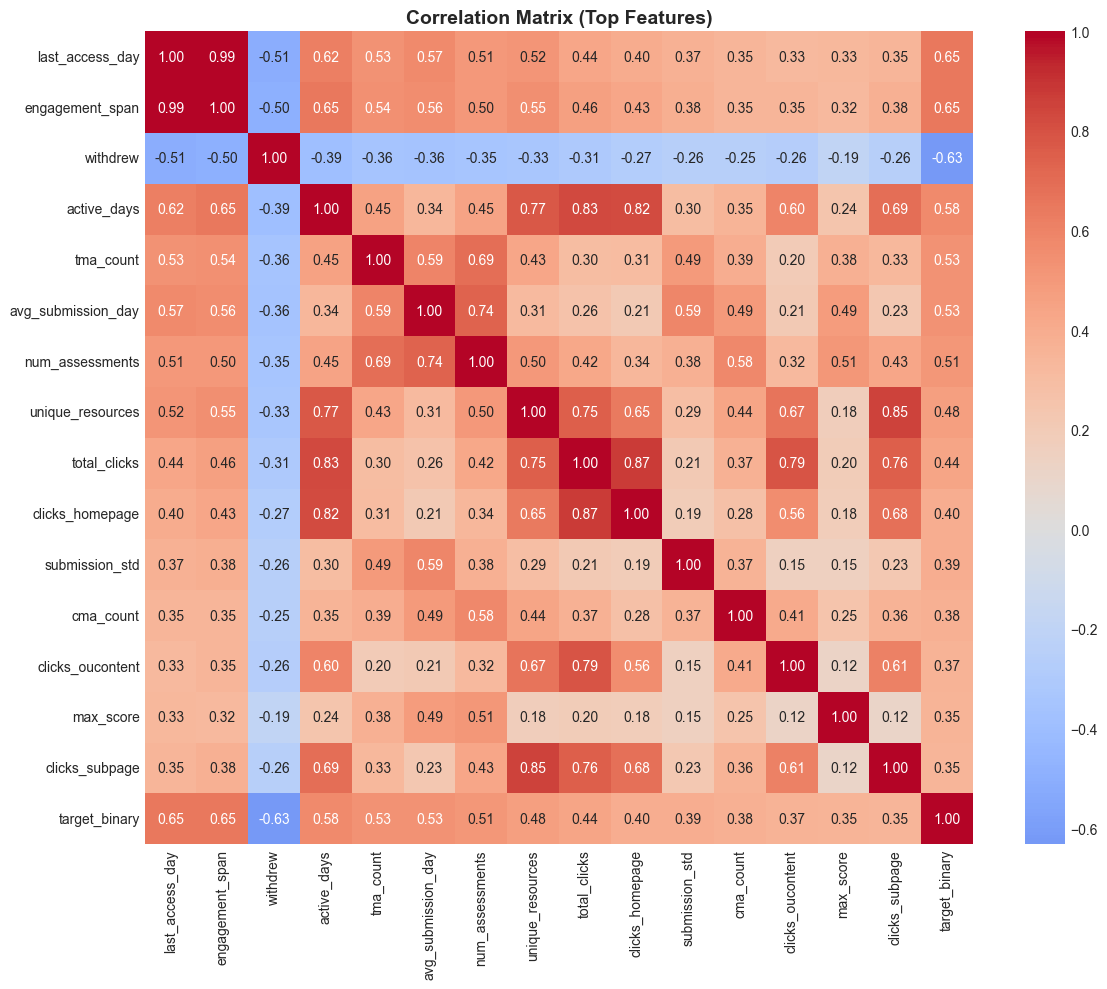

In [38]:
# Visualize correlations
top_features = corr_sorted.head(15).index.tolist()
corr_matrix = df_encoded[top_features + ['target_binary']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (Top Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5️⃣ Modelling - Predictive Model (Supervised ML)

We will build a model to predict student outcomes (Pass/Distinction vs Fail/Withdrawn).

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve)

print("ML libraries loaded!")

ML libraries loaded!


In [40]:
print("Step 16: Prepare features and target")
print("-" * 60)

# Prepare X and y
X = df_encoded[feature_cols].copy()
y = df_encoded['target_binary'].copy()

# Handle any remaining issues
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Train-test split with stratification (as emphasized in class)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print(f"Class distribution in train: {y_train.value_counts().to_dict()}")
print("-" * 60)

Step 16: Prepare features and target
------------------------------------------------------------
Training set: 26,074 samples
Test set: 6,519 samples
Class distribution in train: {0: 13766, 1: 12308}
------------------------------------------------------------


In [41]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


In [42]:
print("Step 17: Train models")
print("-" * 60)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression
    if 'Logistic' in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    print(f"  Accuracy: {results[name]['Accuracy']:.4f}")
    print(f"  AUC-ROC: {results[name]['AUC-ROC']:.4f}")

print("-" * 60)

Step 17: Train models
------------------------------------------------------------

Training Logistic Regression...
  Accuracy: 0.9425
  AUC-ROC: 0.9843

Training Random Forest...
  Accuracy: 0.9563
  AUC-ROC: 0.9882

Training Gradient Boosting...
  Accuracy: 0.9540
  AUC-ROC: 0.9889
------------------------------------------------------------


Step 18: Model comparison
------------------------------------------------------------
                     Accuracy  Precision  Recall      F1  AUC-ROC
Logistic Regression    0.9425     0.9188  0.9633  0.9405   0.9843
Random Forest          0.9563     0.9330  0.9776  0.9548   0.9882
Gradient Boosting      0.9540     0.9295  0.9766  0.9525   0.9889
------------------------------------------------------------


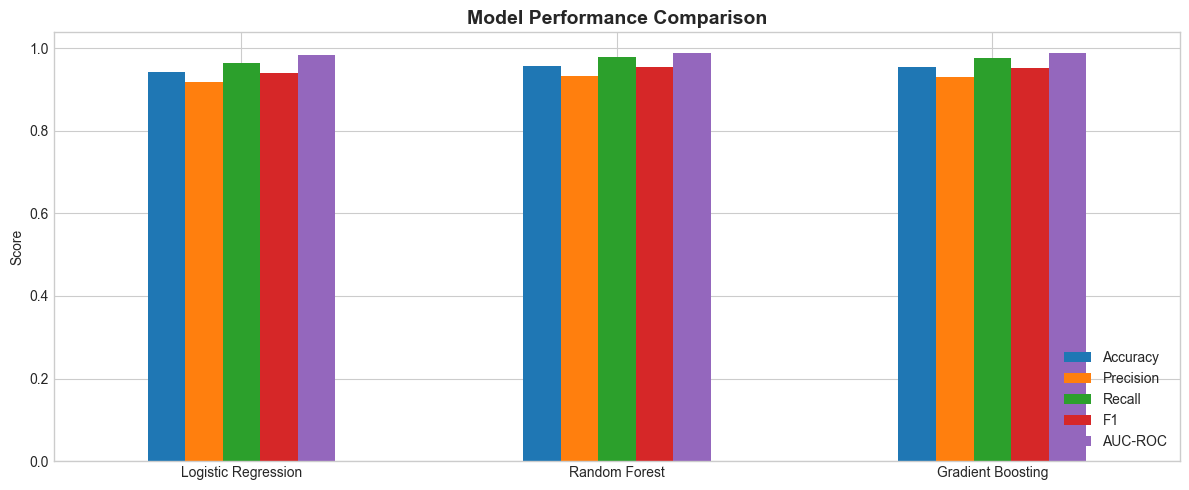

In [43]:
# Results comparison
print("Step 18: Model comparison")
print("-" * 60)

results_df = pd.DataFrame(results).T
print(results_df.round(4))
print("-" * 60)

# Visualize
results_df.plot(kind='bar', figsize=(12, 5))
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [44]:
# Random Forest detailed analysis
print("Step 19: Random Forest detailed analysis")
print("-" * 60)

rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Fail/Withdrawn', 'Pass/Distinction']))

Step 19: Random Forest detailed analysis
------------------------------------------------------------
Classification Report:
                  precision    recall  f1-score   support

  Fail/Withdrawn       0.98      0.94      0.96      3442
Pass/Distinction       0.93      0.98      0.95      3077

        accuracy                           0.96      6519
       macro avg       0.96      0.96      0.96      6519
    weighted avg       0.96      0.96      0.96      6519



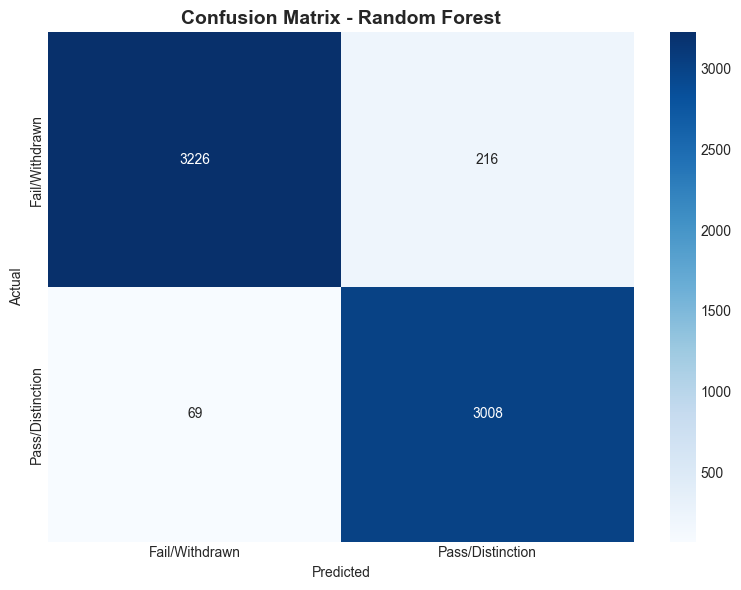

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail/Withdrawn', 'Pass/Distinction'],
            yticklabels=['Fail/Withdrawn', 'Pass/Distinction'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Step 20: Feature importance analysis
------------------------------------------------------------
Top 15 most important features:
           feature  importance
avg_submission_day    0.119432
   last_access_day    0.112442
   engagement_span    0.105970
          withdrew    0.065132
    submission_std    0.048943
   num_assessments    0.047566
       active_days    0.046461
         tma_count    0.043133
         avg_score    0.039380
      total_clicks    0.034286
   clicks_homepage    0.032389
         max_score    0.025803
    exam_avg_score    0.020749
     tma_avg_score    0.018278
  unique_resources    0.016802
------------------------------------------------------------


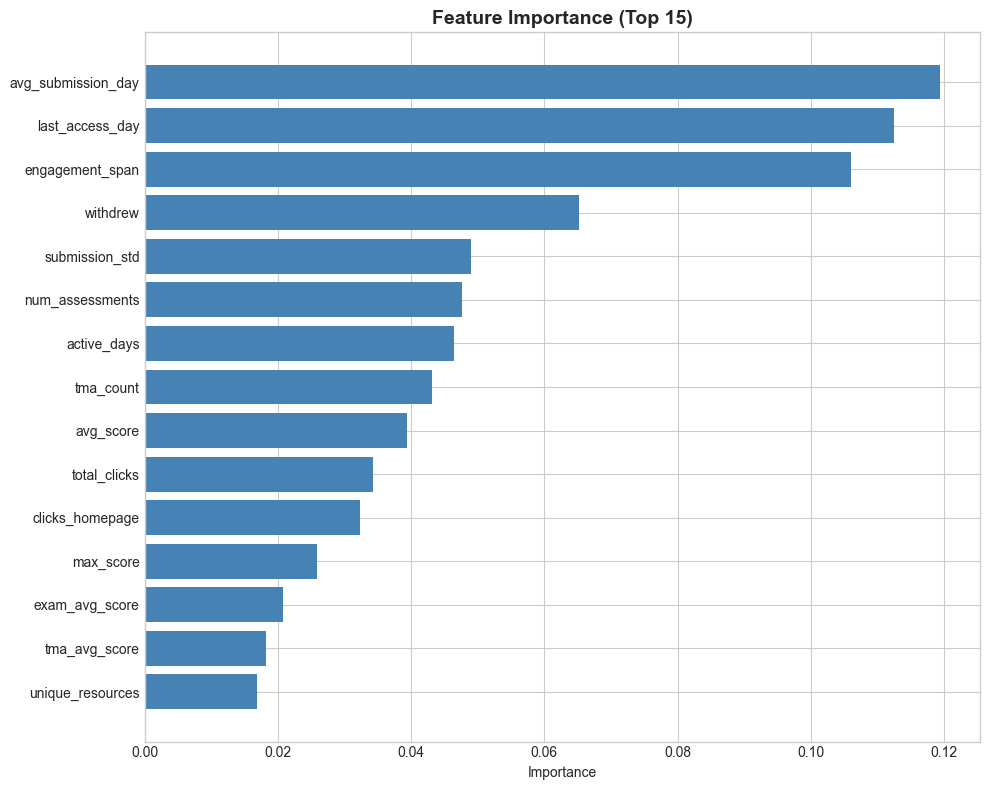

In [46]:
# Feature importance
print("Step 20: Feature importance analysis")
print("-" * 60)

feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 most important features:")
print(feature_importance.head(15).to_string(index=False))
print("-" * 60)

# Visualize
plt.figure(figsize=(10, 8))
top_15 = feature_importance.head(15)
plt.barh(range(len(top_15)), top_15['importance'], color='steelblue')
plt.yticks(range(len(top_15)), top_15['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance (Top 15)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

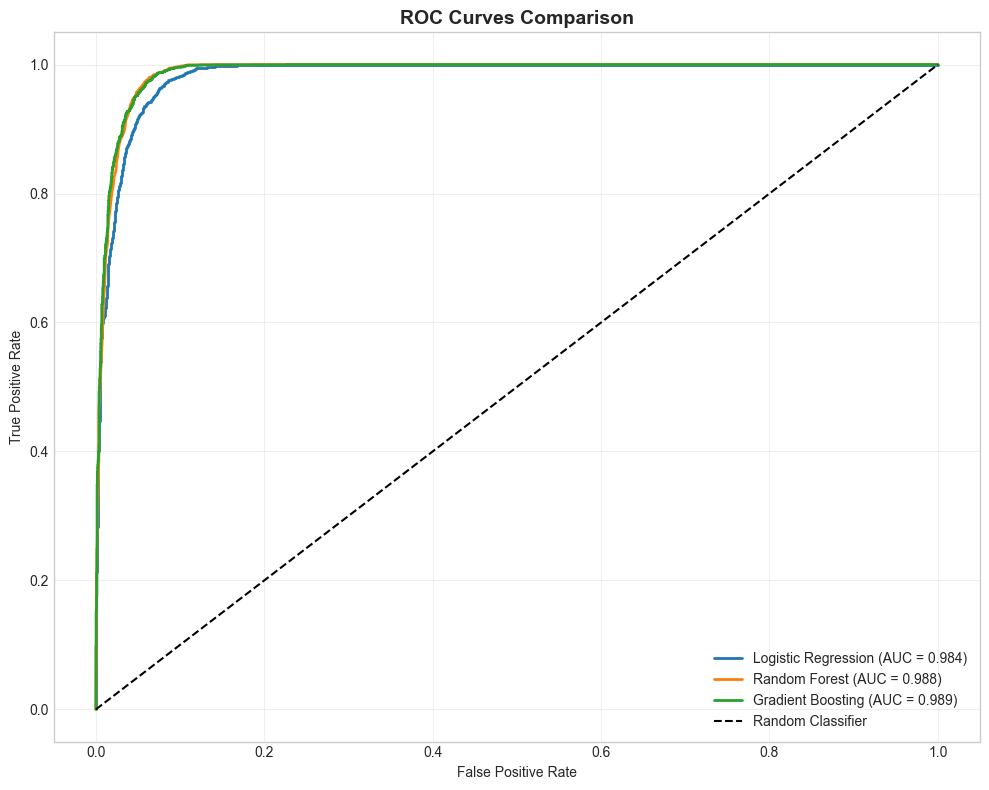

In [47]:
# ROC Curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if 'Logistic' in name:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
# Hyperparameter tuning
print("Step 21: Hyperparameter tuning (Random Forest)")
print("-" * 60)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV AUC-ROC: {grid_search.best_score_:.4f}")

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Test AUC-ROC: {roc_auc_score(y_test, y_proba_best):.4f}")
print("-" * 60)

Step 21: Hyperparameter tuning (Random Forest)
------------------------------------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best CV AUC-ROC: 0.9873
Test Accuracy: 0.9557
Test AUC-ROC: 0.9884
------------------------------------------------------------


# 6️⃣ Modelling - Clustering Model (Unsupervised ML)

We will segment students based on engagement patterns using K-Means clustering.

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

print("Clustering libraries loaded!")

Clustering libraries loaded!


In [50]:
print("Step 22: Select engagement features for clustering")
print("-" * 60)

clustering_features = [
    'total_clicks', 'avg_daily_clicks', 'active_days', 'unique_resources',
    'early_clicks', 'early_active_days', 'pre_course_clicks',
    'avg_score', 'num_assessments', 'avg_days_early',
    'clicks_per_active_day', 'engagement_span'
]

# Keep only available features
clustering_features = [f for f in clustering_features if f in df_encoded.columns]
print(f"Using {len(clustering_features)} features for clustering")
print("-" * 60)

Step 22: Select engagement features for clustering
------------------------------------------------------------
Using 12 features for clustering
------------------------------------------------------------


In [51]:
# Prepare clustering data
X_cluster = df_encoded[clustering_features].copy()
X_cluster = X_cluster.replace([np.inf, -np.inf], np.nan).fillna(0)

# Scale for clustering (important for K-Means)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print(f"Clustering data shape: {X_cluster_scaled.shape}")

Clustering data shape: (32593, 12)


In [52]:
print("Step 23: Find optimal number of clusters")
print("-" * 60)

K_range = range(2, 11)
inertias = []
silhouette_scores = []
davies_bouldin_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_cluster_scaled, kmeans.labels_))
    print(f"k={k}: Silhouette={silhouette_scores[-1]:.4f}, DB={davies_bouldin_scores[-1]:.4f}")

print("-" * 60)

Step 23: Find optimal number of clusters
------------------------------------------------------------
k=2: Silhouette=0.3826, DB=1.3039
k=3: Silhouette=0.2354, DB=1.4842
k=4: Silhouette=0.2281, DB=1.5148
k=5: Silhouette=0.2278, DB=1.5423
k=6: Silhouette=0.2332, DB=1.5337
k=7: Silhouette=0.2335, DB=1.4658
k=8: Silhouette=0.2411, DB=1.4136
k=9: Silhouette=0.2431, DB=1.3866
k=10: Silhouette=0.2271, DB=1.4250
------------------------------------------------------------


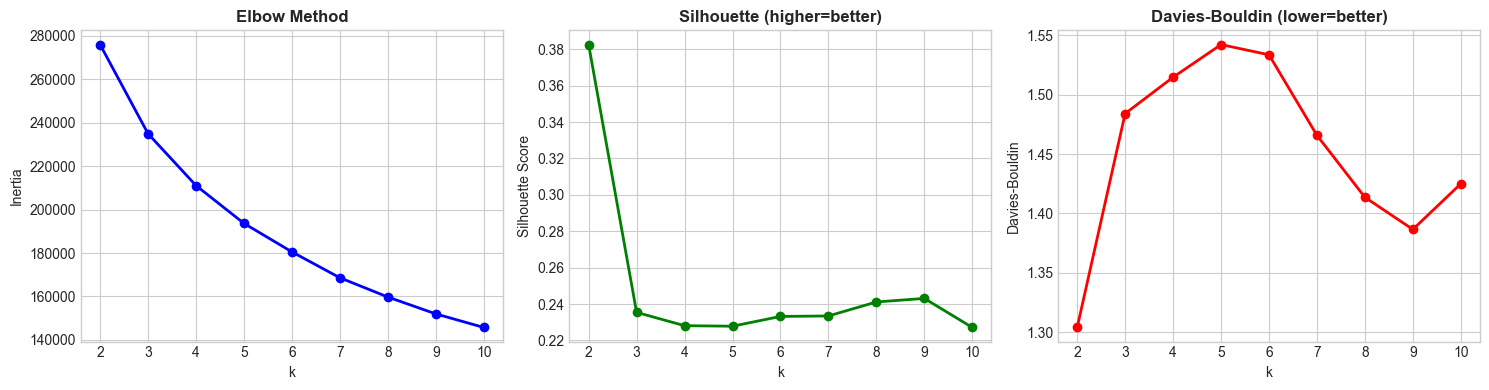

In [53]:
# Visualize cluster evaluation
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method', fontweight='bold')

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2)
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette (higher=better)', fontweight='bold')

axes[2].plot(K_range, davies_bouldin_scores, 'ro-', linewidth=2)
axes[2].set_xlabel('k')
axes[2].set_ylabel('Davies-Bouldin')
axes[2].set_title('Davies-Bouldin (lower=better)', fontweight='bold')

plt.tight_layout()
plt.show()

In [69]:
print("Step 24: Fit final K-Means model")
print("-" * 60)

# Choose optimal k based on above analysis
OPTIMAL_K = 3  # Adjust based on elbow/silhouette

kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

df_encoded['cluster'] = cluster_labels

print(f"Cluster distribution:")
print(df_encoded['cluster'].value_counts().sort_index())
print("-" * 60)

Step 24: Fit final K-Means model
------------------------------------------------------------
Cluster distribution:
cluster
0    17361
1     5015
2    10217
Name: count, dtype: int64
------------------------------------------------------------


In [70]:
print("Step 25: Cluster profiling")
print("-" * 60)

cluster_profiles = df_encoded.groupby('cluster')[clustering_features].mean()
print("Cluster centroids (mean values):")
print(cluster_profiles.round(2).T)
print("-" * 60)

Step 25: Cluster profiling
------------------------------------------------------------
Cluster centroids (mean values):
cluster                      0        1       2
total_clicks           1066.13  4206.13  243.78
avg_daily_clicks          3.22     4.32    2.78
active_days              63.82   139.74   15.42
unique_resources         65.35   147.17   25.41
early_clicks            149.62   630.58   99.14
early_active_days         8.40    18.58    6.00
pre_course_clicks        51.53   238.28   41.81
avg_score                75.44    80.50   66.57
num_assessments           7.58     9.71    3.99
avg_days_early            6.18    33.52    3.62
clicks_per_active_day    17.20    31.46   15.20
engagement_span         240.14   250.90   76.57
------------------------------------------------------------


In [71]:
# Cluster vs final outcome
print("Step 26: Cluster vs Final Result")
print("-" * 60)

cluster_outcome = pd.crosstab(df_encoded['cluster'], df_encoded['final_result'], normalize='index') * 100
print(cluster_outcome.round(1))

# Success rate per cluster
success_rate = df_encoded.groupby('cluster')['target_binary'].mean() * 100
print("\nSuccess Rate (Pass/Distinction) per Cluster:")
for c, rate in success_rate.items():
    print(f"  Cluster {c}: {rate:.1f}%")
print("-" * 60)

Step 26: Cluster vs Final Result
------------------------------------------------------------
final_result  Distinction  Fail  Pass  Withdrawn
cluster                                         
0                    10.9  15.4  51.9       21.8
1                    22.5   8.4  62.2        6.9
2                     0.1  38.7   2.2       58.9

Success Rate (Pass/Distinction) per Cluster:
  Cluster 0: 62.8%
  Cluster 1: 84.7%
  Cluster 2: 2.3%
------------------------------------------------------------


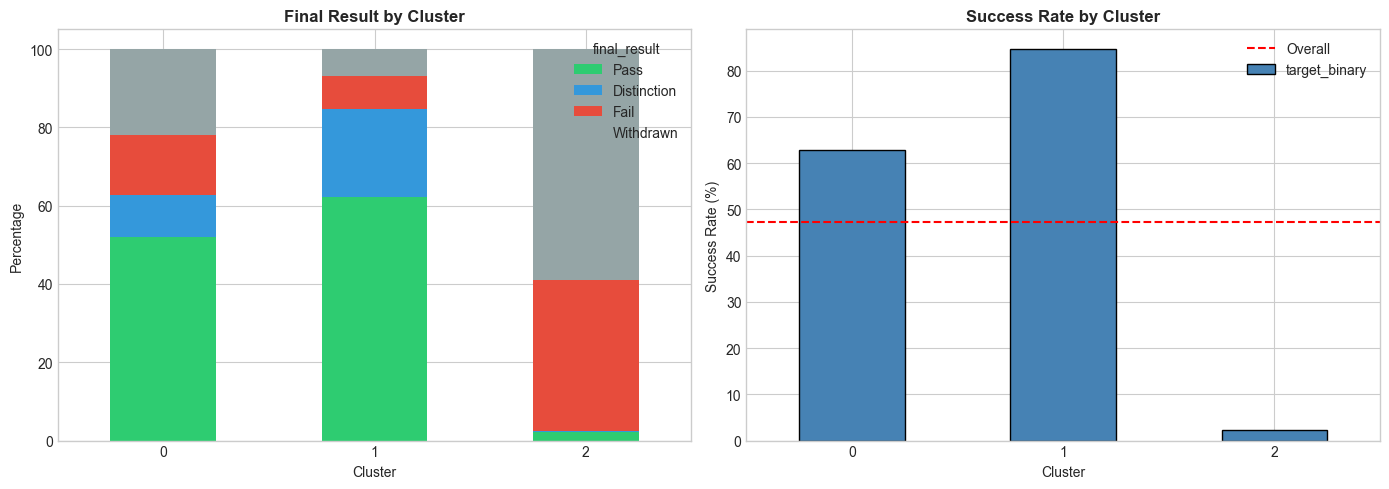

In [72]:
# Visualize cluster outcomes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cluster_outcome[['Pass', 'Distinction', 'Fail', 'Withdrawn']].plot(
    kind='bar', stacked=True, ax=axes[0],
    color=['#2ecc71', '#3498db', '#e74c3c', '#95a5a6'])
axes[0].set_title('Final Result by Cluster', fontweight='bold')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percentage')
axes[0].tick_params(axis='x', rotation=0)

success_rate.plot(kind='bar', ax=axes[1], color='steelblue', edgecolor='black')
axes[1].set_title('Success Rate by Cluster', fontweight='bold')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Success Rate (%)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].axhline(y=df_encoded['target_binary'].mean()*100, color='red', linestyle='--', label='Overall')
axes[1].legend()

plt.tight_layout()
plt.show()

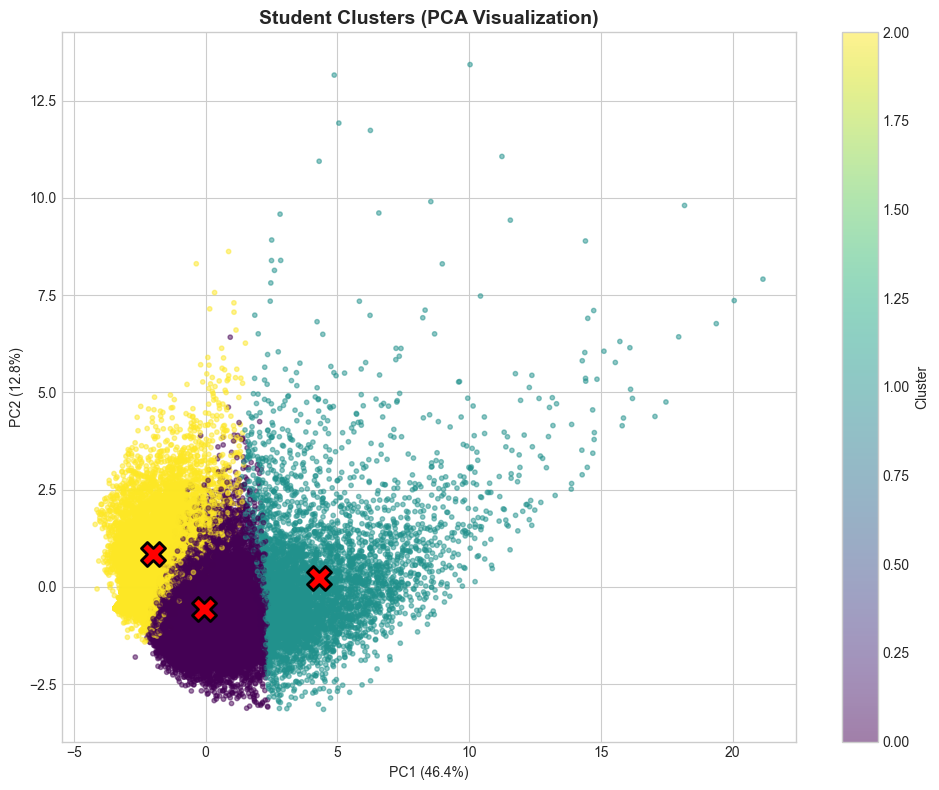

In [73]:
# PCA visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, label='Cluster')

# Add centroids
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=300, edgecolors='black', linewidths=2)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Student Clusters (PCA Visualization)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 7️⃣ Evaluation Summary

In [74]:
print("=" * 60)
print("EVALUATION SUMMARY")
print("=" * 60)

print("\n--- PREDICTIVE MODEL ---")
print(f"Best Model: Random Forest (Tuned)")
print(f"Test AUC-ROC: {roc_auc_score(y_test, y_proba_best):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

print("\nTop 5 Predictive Features:")
for _, row in feature_importance.head(5).iterrows():
    print(f"  - {row['feature']}: {row['importance']:.4f}")

print("\n--- CLUSTERING MODEL ---")
print(f"Number of Clusters: {OPTIMAL_K}")
print(f"Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.4f}")

print("\nCluster Success Rates:")
for c, rate in success_rate.items():
    risk = 'HIGH RISK' if rate < 50 else 'MEDIUM RISK' if rate < 70 else 'LOW RISK'
    print(f"  Cluster {c}: {rate:.1f}% - {risk}")

print("\n" + "=" * 60)

EVALUATION SUMMARY

--- PREDICTIVE MODEL ---
Best Model: Random Forest (Tuned)
Test AUC-ROC: 0.9884
Test Accuracy: 0.9557

Top 5 Predictive Features:
  - avg_submission_day: 0.1194
  - last_access_day: 0.1124
  - engagement_span: 0.1060
  - withdrew: 0.0651
  - submission_std: 0.0489

--- CLUSTERING MODEL ---
Number of Clusters: 3
Silhouette Score: 0.2354

Cluster Success Rates:
  Cluster 0: 62.8% - MEDIUM RISK
  Cluster 1: 84.7% - LOW RISK
  Cluster 2: 2.3% - HIGH RISK



# 8️⃣ Deployment Considerations

## Recommendations for the Open University:

1. **Early Warning System:** Deploy the Random Forest model to flag at-risk students
2. **Run predictions weekly** during the first 4 weeks of term
3. **Focus on key predictors:** Assessment scores, VLE engagement, early clicks
4. **Targeted interventions** based on cluster membership
5. **Monitor and retrain** the model each semester

## Limitations:
- Model trained on historical data
- May not generalize to new module types
- Requires real-time VLE data access

---

## Questions for Amir:
1. Can we use statistical methods (Pearson correlation) beyond module content?
2. Does everyone need to present slides?